In [13]:
import pandas as pd 
import numpy as np 
import itertools 

from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Example 1: Classification Tree on the Job Data

In [5]:
# loading the data
job_data = pd.read_csv('../data/jobs.csv')
job_data

,CGPA,Interactive,PracticalKnowledge,CommSkills,Label
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Poor,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very good,Good,Yes
8,>=8,Yes,Very good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [7]:
def p_k(data, feature_name): 
    points = data[feature_name].values.tolist()
    p = {}
    
    for i in set(points) : 
        p[i] = points.count(i)/len(points)
    return p 

In [8]:
p_k(job_data, 'Label')

{'Yes': 0.7, 'No': 0.3}

In [9]:
def gini_index(p_k) : 
    s = 0 
    for k in p_k.keys(): 
        s += p_k[k]**2 
    return 1 - s 

In [10]:
gini_index(p_i(job_data, 'Label'))

0.42000000000000004

In [12]:
cgpa_set = set(job_data['CGPA'].values)
cgpa_set

{'<8', '>=8', '>=9'}

In [14]:
for elt in itertools.product(cgpa_set, cgpa_set): 
    print(elt)

('>=8', '>=8')
('>=8', '<8')
('>=8', '>=9')
('<8', '>=8')
('<8', '<8')
('<8', '>=9')
('>=9', '>=8')
('>=9', '<8')
('>=9', '>=9')


In [15]:
# Define a function that computes the powerset of a given set A
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))


In [16]:
cgpa_powerset = powerset(cgpa_set)
list(cgpa_powerset)

[(),
 ('>=8',),
 ('<8',),
 ('>=9',),
 ('>=8', '<8'),
 ('>=8', '>=9'),
 ('<8', '>=9'),
 ('>=8', '<8', '>=9')]

In [24]:
X = list(job_data.columns)[:-1] # Features
y = job_data.Label # Target variable

In [25]:
X

['CGPA', 'Interactive', 'PracticalKnowledge', 'CommSkills']

In [26]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(job_data['Label'])
 
# printing label
label

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [28]:
# Transforming our Categorical data to num data

job_df = job_data.copy()

for f in job_data.columns : 
    cat_f = le.fit_transform(job_data[f])
    job_df.drop(f, axis=1, inplace=True)
    job_df[f] = cat_f
    

In [29]:
job_df

,CGPA,Interactive,PracticalKnowledge,CommSkills,Label
0,2,1,2,0,1
1,1,0,1,1,1
2,2,0,0,2,0
3,0,0,0,2,0
4,1,1,1,1,1
5,2,1,1,1,1
6,0,1,1,2,0
7,2,0,2,0,1
8,1,1,2,0,1
9,1,1,0,0,1


In [30]:
X = job_df[list(job_data.columns)[:-2]] # Features
y = job_df.Label # Target variable

clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

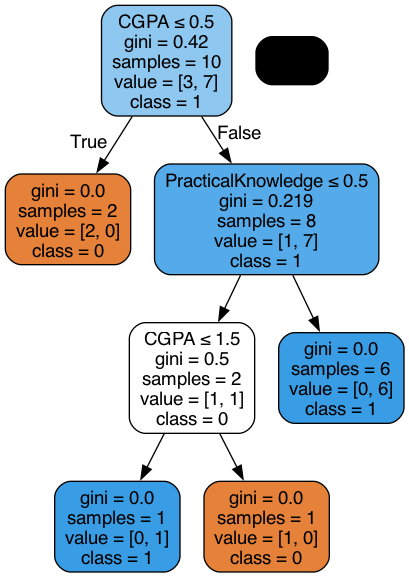

In [32]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = list(job_data.columns)[:-2],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('jobs.png')
Image(graph.create_png())

In [35]:
# we can predict using 
y_pred = clf.predict(X[:1])

In [39]:
print(f"the predicted lebel is {y_pred}")
print(f"the correct label is {y[1]}")

the predicted lebel is [1]
the correct label is 1


## Example 2: Classification Tree on the Diabetes Data

In [53]:
# load the data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("../data/diabetes.csv", header=None, names=col_names)
random_sample = np.random.randint(0, 767, 500)
pima = pima.iloc[random_sample]
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
515,3,99,54,19,86,25.6,0.154,24,0
720,5,97,76,27,0,35.6,0.378,52,1
447,1,100,72,12,70,25.3,0.658,28,0
373,0,84,64,22,66,35.8,0.545,21,0
479,8,126,74,38,75,25.9,0.162,39,0
...,...,...,...,...,...,...,...,...,...
40,4,111,72,47,207,37.1,1.39,56,1
599,1,173,74,0,0,36.8,0.088,38,1
257,3,111,56,39,0,30.1,0.557,30,0
72,5,139,64,35,140,28.6,0.411,26,0


In [54]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [55]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
227,0,0,35.7,26,101,76,0.198
89,15,110,37.1,43,136,70,0.153
159,2,53,29,22,88,74,0.229
511,12,0,29.7,46,84,72,0.297
543,10,0,34.9,56,90,85,0.825
...,...,...,...,...,...,...,...
622,2,0,24.2,28,92,76,1.698
522,3,130,33.2,26,124,80,0.305
170,3,78,28.4,29,111,90,0.495
637,5,0,28.8,48,104,74,0.153


In [56]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [57]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [58]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7866666666666666


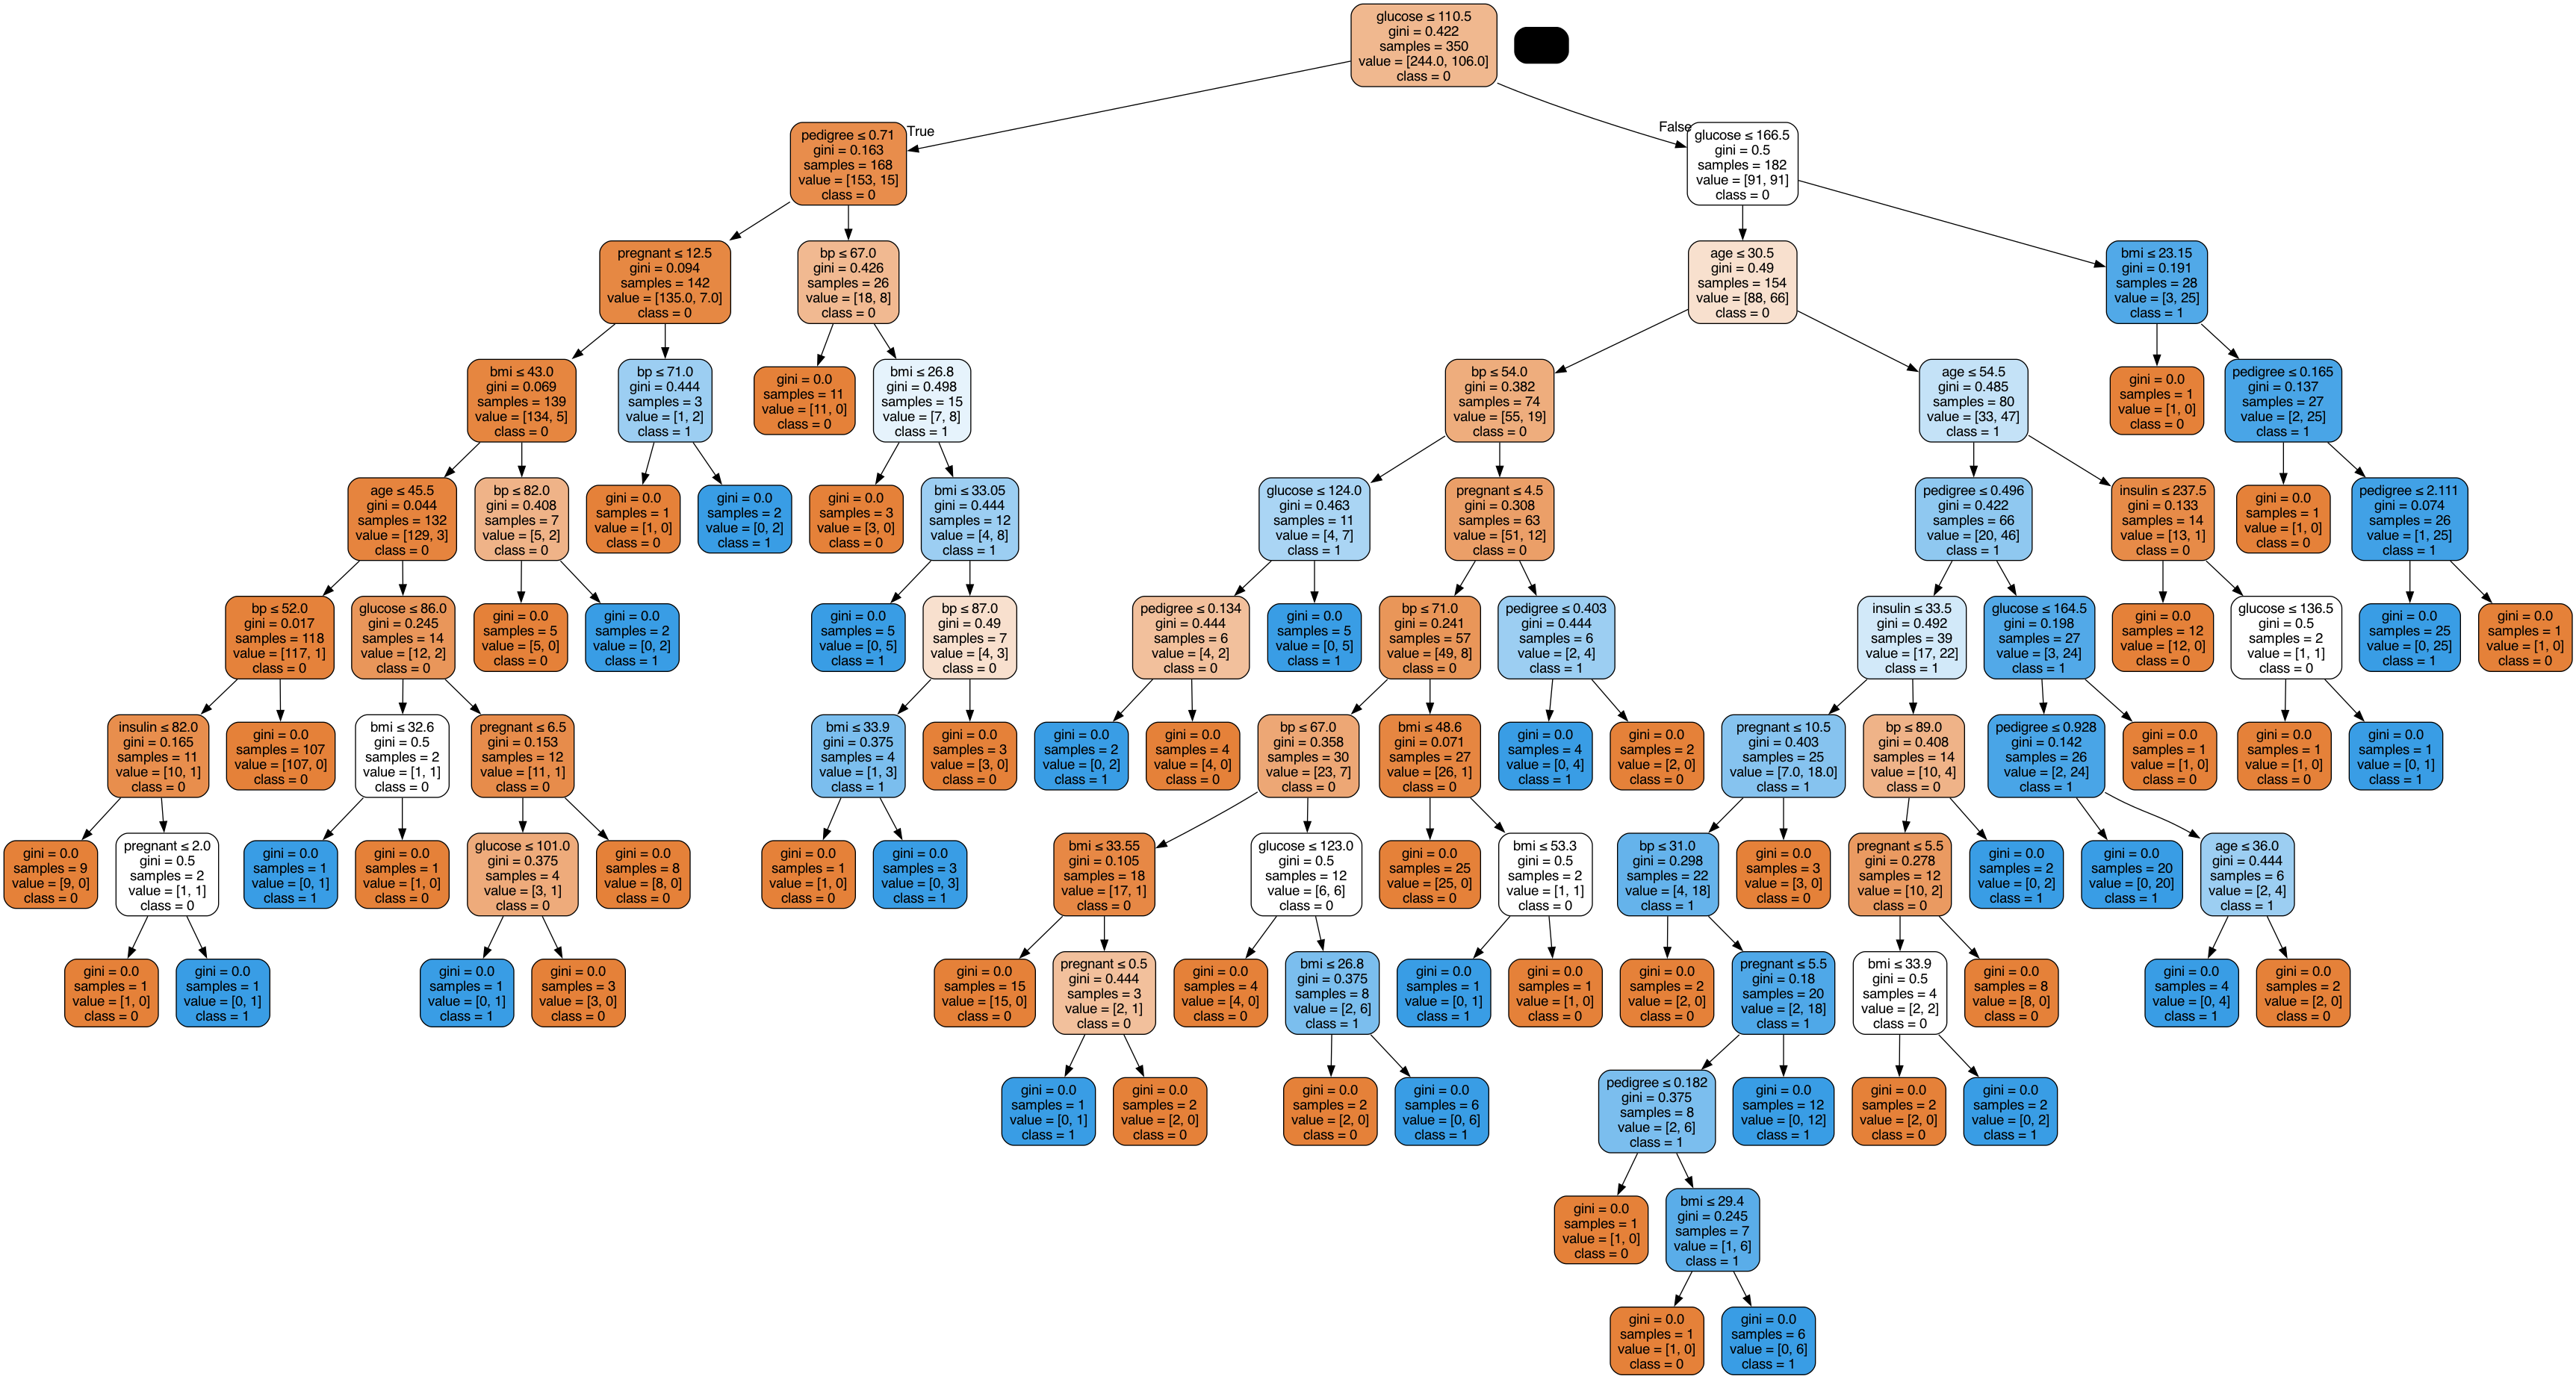

In [60]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../images/diabetes.png')
Image(graph.create_png())

In [61]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.72


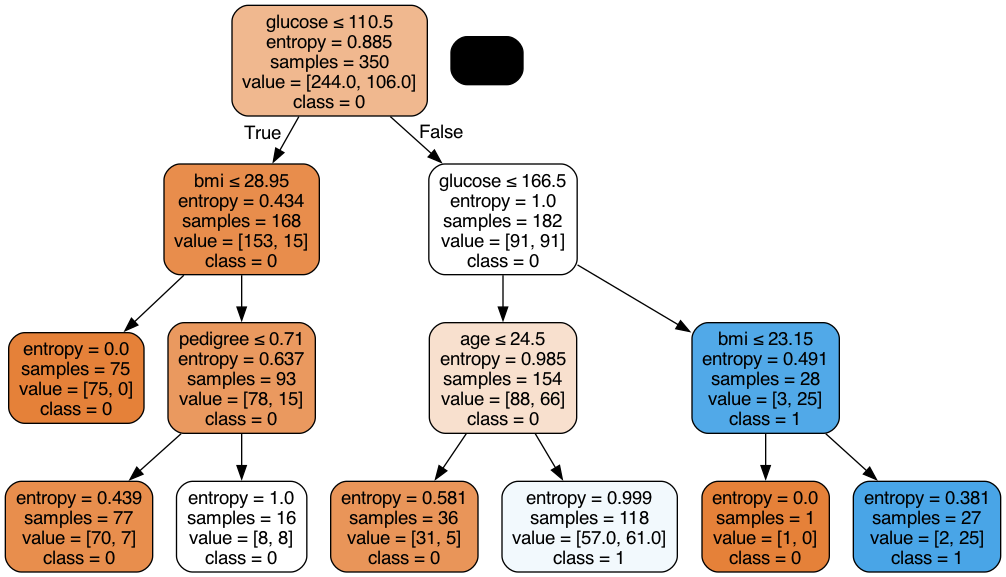

In [62]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../images/diabetes2.png')
Image(graph.create_png())